###### Data Description :
    
    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
    
    The Task is to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

###### Importing the Libraries:

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###### Acquiring the Data:

In [268]:
data=pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [269]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [270]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [271]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002863,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


    > The data has outliers and Null values, which will be treated going forward
    > The problem is classication model and has binary target variable.
    > Total of 614 entries in the dataset.

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###### EDA:

By looking at the info tab above, many of the columns has missing values. we will have to treat the missing values first.

In [273]:
#Checking Null Values:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History has null values. 
we will treat these missing values by mean, median or mode of respective column values

In [274]:
#Gender
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [275]:
#Lets fill the missing values by the mode that is Male
data['Gender'].fillna('Male', inplace=True)

In [276]:
data["Gender"].isnull().any()

False

In [277]:
#Married
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [278]:
#Lets fill the missing values by the mode that is Yes
data['Married'].fillna('Yes', inplace=True)

In [279]:
data["Married"].isnull().any()

False

In [280]:
#Dependents
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [281]:
data['Dependents'].mode()

0    0
dtype: object

Dependents has 4 categories with 0 being the highest. So we will replace the missing values with 0 as no dependents

In [282]:
data['Dependents'].fillna('0', inplace=True)

In [283]:
data['Dependents'].isnull().sum()

0

In [284]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [285]:
#Self_Employed 
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [286]:
#Lets fill the missing values by the mode that is No
data['Self_Employed'].fillna('No', inplace=True)

In [287]:
data['Self_Employed'].isnull().any()

False

In [288]:
#LoanAmount
data["LoanAmount"].mean()

146.41216216216216

In [289]:
round(data["LoanAmount"].mean())

146

In [290]:
data["LoanAmount"].median()

128.0

In [291]:
data["LoanAmount"].mode()

0    120.0
dtype: float64

In [292]:
#Lets fill the missing value of LoanAmount by the mean value
data["LoanAmount"].fillna(round(data["LoanAmount"].mean()), inplace=True)

In [293]:
data["LoanAmount"].mean()

146.3973941368078

In [294]:
data["LoanAmount"].isnull().any()

False

In [295]:
#Loan_Amount_Term
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [296]:
#Lets replace the Missing values with the Mode value.
data['Loan_Amount_Term'].fillna(360, inplace=True)

In [297]:
data['Loan_Amount_Term'].isnull().any()

False

In [298]:
#Credit_History
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [299]:
data['Credit_History'].mode()

0    1.0
dtype: float64

In [300]:
#Lets fill the missing values by the mode that is 1.0
data['Credit_History'].fillna(1.0, inplace=True)

In [301]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [302]:
data['Credit_History'].isnull().any()

False

In [303]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

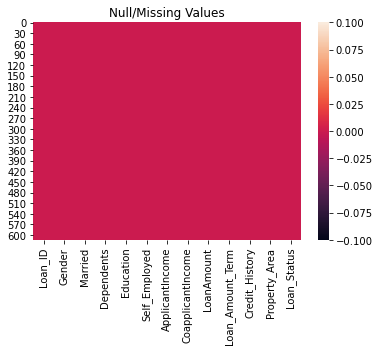

In [304]:
#Visualize Null/Missing Values
sns.heatmap(data.isnull())
plt.title("Null/Missing Values")
plt.show()

All the Missing values are treated.

In [305]:
data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_ID is alphanumeric value, the ID of each customer, which does not contain any informative data. This can be dropped from the dataset

<AxesSubplot:xlabel='Gender', ylabel='count'>

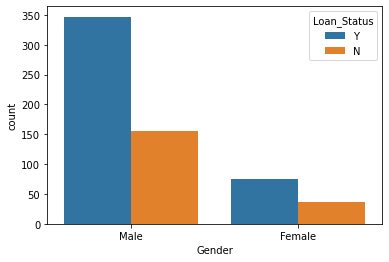

In [306]:
#Lets see the Gender Column how it is distributed 
sns.countplot(x='Gender', data=data, hue='Loan_Status')

There are defualters in both Male and Female categories.

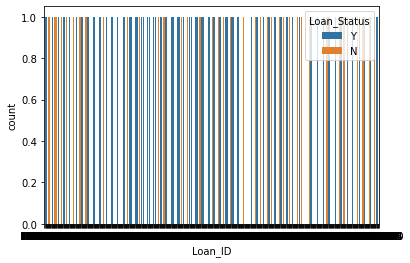

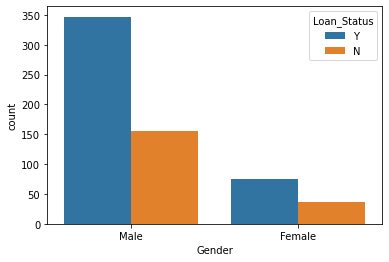

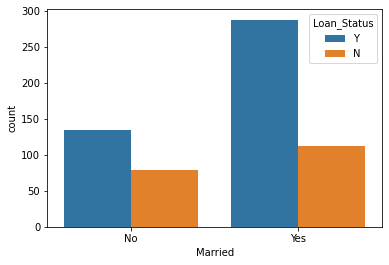

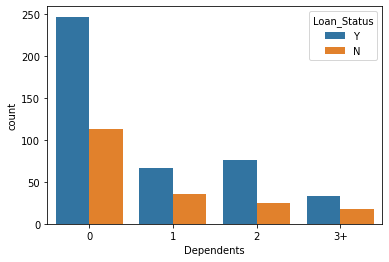

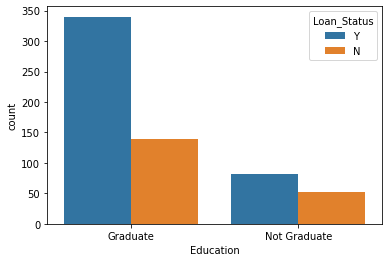

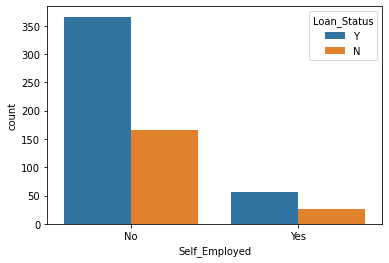

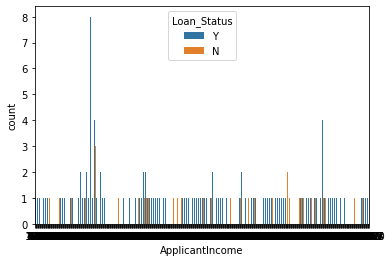

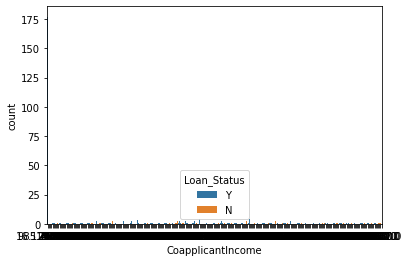

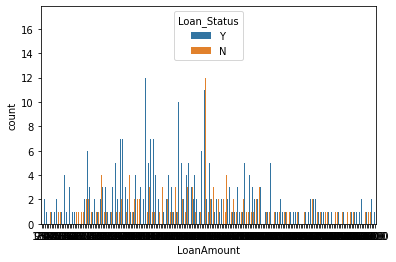

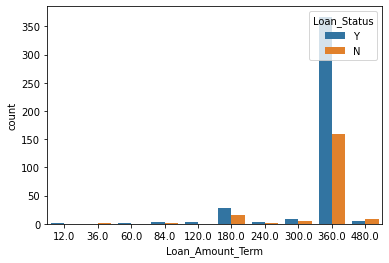

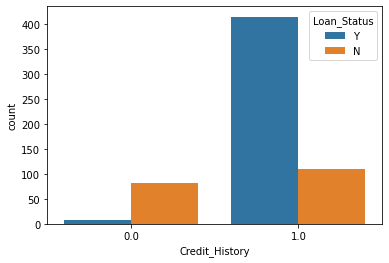

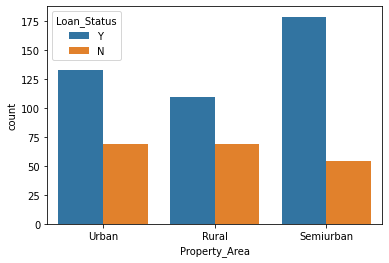

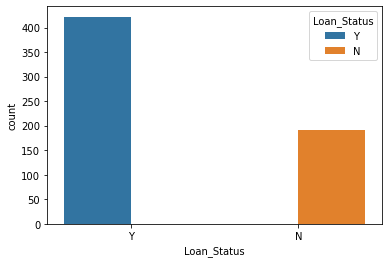

In [307]:
for i in data.keys():
    sns.countplot(x=i, data=data, hue='Loan_Status')
    plt.show()

In [308]:
data.drop(["Loan_ID"], axis=1, inplace=True)

In [309]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [310]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [311]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [312]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [313]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [314]:
data["Dependents"]=data["Dependents"].str.strip("+").astype(int)
data["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

All the object type datas are categorical data. 

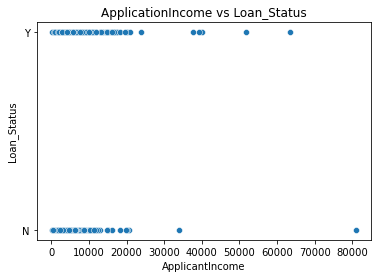

In [315]:
#ApplicantIncome
sns.scatterplot(x=data['ApplicantIncome'], y=data["Loan_Status"])
plt.title("ApplicationIncome vs Loan_Status")
plt.show()


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

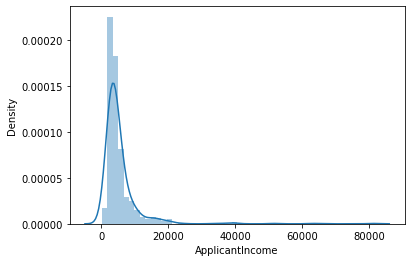

In [316]:
sns.distplot(data['ApplicantIncome'], kde=True)

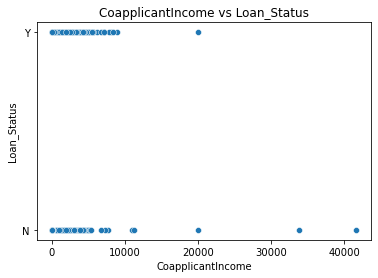

In [317]:
#CoapplicantIncome
sns.scatterplot(x=data['CoapplicantIncome'], y=data["Loan_Status"])
plt.title("CoapplicantIncome vs Loan_Status")
plt.show()


C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

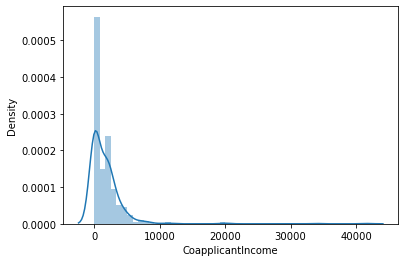

In [318]:
sns.distplot(data['CoapplicantIncome'], kde=True)

ApplicantIncome and CoapplicantIncome income does not affect the loan_status. For lower Income bucket there are cases the loan is approved.

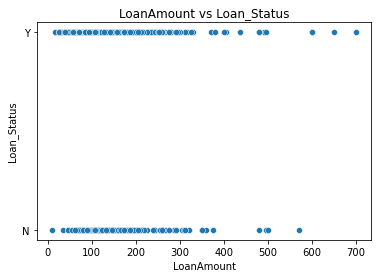

In [319]:
#LoanAmount
sns.scatterplot(x=data['LoanAmount'], y=data["Loan_Status"])
plt.title("LoanAmount vs Loan_Status")
plt.show()

The Loan amount is equally destributed to approved and non approved loans. 

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

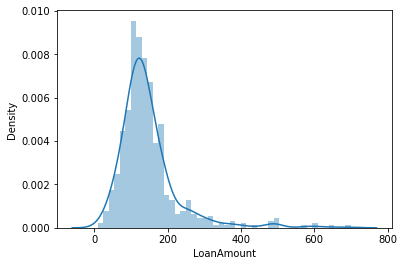

In [320]:
sns.distplot(data['LoanAmount'], kde=True)

There are outliers in the continous data like ApplicantIncome, CoapplicantIncome and LoanAmount which will be treated in future steps

In [321]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###### LabelEncoding:
Lets encode the object type categorical values to numeric values.

In [322]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

#Lets convert object type feature variables to numeric values using LabelEncoding
data['Gender']=LE.fit_transform(data['Gender'])
data['Married']=LE.fit_transform(data['Married'])
data['Education']=LE.fit_transform(data['Education'])
data['Self_Employed']=LE.fit_transform(data['Self_Employed'])
data['Property_Area']=LE.fit_transform(data['Property_Area'])

In [323]:
#Lets convert Target variable Loan_status also to numeric value 
data['Loan_Status']=LE.fit_transform(data['Loan_Status'])

In [324]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


###### Correlation Matrix :

<AxesSubplot:>

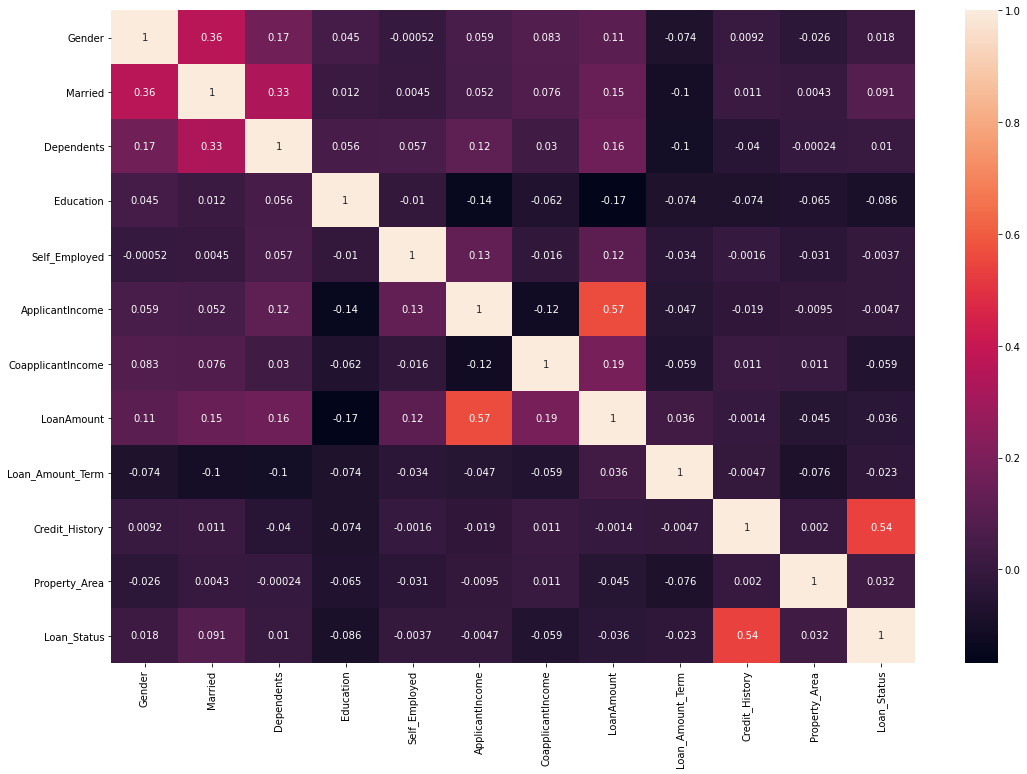

In [325]:
data_cor=data.corr()

fig=plt.figure(figsize=(18,12))
df=data.corr(method='pearson')
sns.heatmap(data_cor,annot=True)

In [326]:
data_cor["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036345
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

Credit_History has highest correlation with Loan_Status. Rest all has very less correlation with Loan_Status.

Lets check for outliers in Continous type data

In [327]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.397394,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037503,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


ApplicantIncome and CoapplicantIncome has Outliers,but this can be ignored as it could be the true incomes of the Applicants.

In [328]:
#Lets split the data into x and y

x=data.drop('Loan_Status', axis=1)
y=data["Loan_Status"]

print(x.shape, y.shape)

(614, 11) (614,)


In [329]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


###### Scaling:

In [330]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

x_mms=mms.fit_transform(x)

0.4048259151907955 0.43288857903514594


In [331]:
x=pd.DataFrame(x_mms, columns=x.columns)

In [332]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198263,0.74359,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


###### Finding the Best Random State :

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i) #Train/Test Splitting
    LR=LogisticRegression()           #LogisticRegression
    LR.fit(x_train,y_train)         #Fitting the Model
    pred=LR.predict(x_test)         #Predition
    acc=accuracy_score(y_test,pred)   #Accuracy score
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Acc:",maxAcc,"on Rand State ",maxRS)

Best Acc: 0.8861788617886179 on Rand State  8


###### Train Test Split :
    

In [349]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=8)

###### Model Building : 

In [350]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score


dtc=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()

model = [dtc, lr, knn, svc,gnb]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test, pred)
    
    print("Accuracy Score of ", m, "is :",acc)
    print("Classification Report :", classification_report(y_test, pred))
    print("Confusion Matrix :", confusion_matrix(y_test,pred))
    print("AUC Score :", roc_auc_score(y_test, pred))
    print('\n')
    


Accuracy Score of  DecisionTreeClassifier() is : 0.7398373983739838
Classification Report :               precision    recall  f1-score   support

           0       0.51      0.64      0.57        33
           1       0.85      0.78      0.81        90

    accuracy                           0.74       123
   macro avg       0.68      0.71      0.69       123
weighted avg       0.76      0.74      0.75       123

Confusion Matrix : [[21 12]
 [20 70]]
AUC Score : 0.7070707070707071


Accuracy Score of  LogisticRegression() is : 0.8861788617886179
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123

Confusion Matrix : [[19 14]
 [ 0 90]]
AUC Score : 0.7878787878787878


Accuracy Score of  KNeig

###### Cross Validation:

In [351]:
from sklearn.model_selection import cross_val_score

for m in model:
    cvs=cross_val_score(m,x,y,cv=3)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[0.72195122 0.69756098 0.69117647]
accuracy of the model DecisionTreeClassifier() is  0.7035628885700621


[0.8        0.79512195 0.83333333]
accuracy of the model LogisticRegression() is  0.8094850948509485


[0.80487805 0.78536585 0.78921569]
accuracy of the model KNeighborsClassifier() is  0.7931531962378447


[0.8        0.79512195 0.83333333]
accuracy of the model SVC() is  0.8094850948509485


[0.7902439  0.76585366 0.82352941]
accuracy of the model GaussianNB() is  0.7932089909134387




###### EnsembleTechnique:

In [352]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

ens=[rfc, abc, gbc]

for i in ens:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    acc=accuracy_score(y_test, pred)
    
    print("Accuracy Score of ", i, "is :",acc)
    print("Classification Report :", classification_report(y_test, pred))
    print("Confusion Matrix :", confusion_matrix(y_test,pred))
    print('\n')

Accuracy Score of  RandomForestClassifier() is : 0.8455284552845529
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.61      0.68        33
           1       0.87      0.93      0.90        90

    accuracy                           0.85       123
   macro avg       0.82      0.77      0.79       123
weighted avg       0.84      0.85      0.84       123

Confusion Matrix : [[20 13]
 [ 6 84]]


Accuracy Score of  AdaBoostClassifier() is : 0.8617886178861789
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.61      0.70        33
           1       0.87      0.96      0.91        90

    accuracy                           0.86       123
   macro avg       0.85      0.78      0.81       123
weighted avg       0.86      0.86      0.85       123

Confusion Matrix : [[20 13]
 [ 4 86]]


Accuracy Score of  GradientBoostingClassifier() is : 0.8861788617886179
Classification

We found the Maximum accuracy with GradientBoostingClassifier at 89%.

###### Hyper Parameter Tuning:

In [353]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':range(20,300,10)}

gbc=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=20,min_samples_leaf=50,max_depth=8)

GCV=GridSearchCV(gbc, params, refit=True, cv=5, verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=   0.0s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=   0.0s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=   0.1s
[CV] n_estimators=40 .................................................
[CV] .

[CV] ................................. n_estimators=150, total=   0.2s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.2s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.2s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.1s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.2s
[CV] n_estimators=160 ................................................
[CV] ................................. n_estimators=160, total=   0.2s
[CV] n_estimators=160 ................................................
[CV] ................................. n_estimators=160, total=   0.2s
[CV] n_estimators=160 ................................................
[CV] .

[CV] ................................. n_estimators=260, total=   0.1s
[CV] n_estimators=270 ................................................
[CV] ................................. n_estimators=270, total=   0.2s
[CV] n_estimators=270 ................................................
[CV] ................................. n_estimators=270, total=   0.2s
[CV] n_estimators=270 ................................................
[CV] ................................. n_estimators=270, total=   0.2s
[CV] n_estimators=270 ................................................
[CV] ................................. n_estimators=270, total=   0.2s
[CV] n_estimators=270 ................................................
[CV] ................................. n_estimators=270, total=   0.2s
[CV] n_estimators=280 ................................................
[CV] ................................. n_estimators=280, total=   0.2s
[CV] n_estimators=280 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.6s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  min_samples_leaf=50,
                                                  min_samples_split=20),
             param_grid={'n_estimators': range(20, 300, 10)}, verbose=2)

In [354]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'n_estimators': 20}
Best Estimator :  GradientBoostingClassifier(max_depth=8, min_samples_leaf=50,
                           min_samples_split=20, n_estimators=20)


In [355]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))
print("Accuracy Score :",accuracy_score(y_test,GCV_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123

Accuracy Score : 0.8861788617886179


###### Saving the Best Model:

In [357]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan Application Status.obj")

['Loan Application Status.obj']